<div style="text-align: center;">
  <img src="./image/banner.png" width="900"/>
</div>


<h1 style='text-align: center;'>Nguyễn Thế Đạt - RFM Project</h1>

# **Step 1. Install, import library and data set using in this project**

In [2]:
# Import library use in this notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
import squarify as sq
import adjustText

## Import dataset

In [3]:
df = pd.read_csv("./data/ecommerce_data.csv", encoding="latin1")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
segment = pd.read_csv("./data/segmentation.csv", encoding="latin1")
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


## Preprocess RFM Score data

In [5]:
# Split RFM Scores by delimeter ' , ', and explode it to rows
segment_alt = (segment.set_index(['Segment']).apply(lambda x: x.str.split(',').explode()).reset_index())
segment_alt.columns = ['Segment', 'RFM_Scores']
segment_alt.head(5)

,Segment,RFM_Scores
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


# **Step 2. Exploratory Data Analysis**

In [6]:
# lowercase columns title
df.columns = [col.lower() for col in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,quantity,unitprice,customerid
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


> - Tìm hiểu tại sao quantity & unitprice lại có giá trị âm

## Clean the irrelevant data (negative quantity rows)

In [9]:

defect_quantity = df[(df['quantity'] < 0) & (~df['invoiceno'].str.contains('C'))].shape[0] # Data with negative quantity but not related to canceled bill.
cancel_quantity = df[(df['quantity'] < 0) & (df['invoiceno'].str.contains('C'))].shape[0] # Data with negative quantity that corresponded to canceled bill.

print(f"There are {defect_quantity} defective invoice in the dataset.")
print(f"There are {cancel_quantity} cancel invoice in the dataset.")


There are 1336 defective invoice in the dataset.
There are 9288 cancel invoice in the dataset.


>* Các đơn hàng có quantity âm bao gồm những đơn hàng huỷ tới từ khách hàng và những đơn có hàng bị lỗi. 
>* Chúng ta muốn tính hành vi chi tiêu thuần của khách hàng chứ không tính hành vi chi tiêu bao gồm cả hành vi trả hàng.
>* Do đó đối với project này tôi sẽ lọc tất cả các đơn hàng bị lỗi và return ra một bảng riêng. (Phục vụ cho return analysis nếu cần.)

In [10]:
# Store the defective and cancelled invoice in separate dataframes
cancelled_df = df[(df['quantity'] < 0)]
 
cancelled_df.shape

(10624, 8)

In [11]:
# Assign data without negative quantity
clean_df = df[~(df['quantity'] < 0)]

clean_df.describe()

,quantity,unitprice,customerid
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


> Investigate negative unit price 

## Clean the irrelevant data (negative unitprice rows)

In [12]:
clean_df[clean_df['unitprice'] < 0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


>* Bên cạnh đó các đơn hàng có giá trị âm là các đơn hàng liên quan đến điều chỉnh nợ xấu, mặc dù không có customerId, nhưng tôi vẫn sẽ lọc những giá trị này ra khỏi bài phân tích RFM.

In [13]:
clean_df = clean_df[~(clean_df['unitprice'] < 0)]

clean_df.describe()

,quantity,unitprice,customerid
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Clean null values

In [14]:
# Check null values
clean_df.isna().sum()

invoiceno           0
stockcode           0
description       592
quantity            0
invoicedate         0
unitprice           0
customerid     133359
country             0
dtype: int64

In [15]:
# Investigate the null values in description and customer ID columns

display(clean_df[clean_df['customerid'].isna()].head()) # null rows in customer ID

display(clean_df[(clean_df['description'].notna()) & clean_df['customerid'].isna()]) # Rows with description but no customer ID

display(clean_df[(clean_df['description'].isna()) & clean_df['customerid'].notna()]) # Rows with customer ID but no description

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country


> Null *description* rows also null *customerid* 

In [16]:
print(f"Total null values in the dataset is {clean_df.isna().sum().sum():,} rows. Contribute about {clean_df.isna().sum().sum()/clean_df.shape[0]*100:.2f}% of the dataset.")

Total null values in the dataset is 133,951 rows. Contribute about 25.21% of the dataset.


>* Investigate why these invoices don't have a customerID. Is there a problem with inputting the data, or are these anonymous customers? If so, why?
>* At this point, I will temporarily remove those invoices without a customerID from the analysis.

In [17]:
# Keep only non-null values in customerId and description columns
clean_df = clean_df[clean_df['customerid'].notna()]

## Drop duplicated data

In [18]:
# Check duplicate values
clean_df[clean_df.duplicated()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [19]:
# Drop and keep only first duplicates values
clean_df = clean_df.drop_duplicates()
clean_df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Filter and keep the most contribute data on the dataset (United Kingdom)

In [20]:
total_trans_per_country = clean_df.groupby(['country']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

total_trans_per_country['%'] = total_trans_per_country['counts'] / len(clean_df) * 100

total_trans_per_country.head(10)

,country,counts,%
35,United Kingdom,349227,88.922471
14,Germany,9027,2.298514
13,France,8327,2.120275
10,EIRE,7228,1.840441
30,Spain,2480,0.631474
23,Netherlands,2363,0.601683
3,Belgium,2031,0.517147
32,Switzerland,1842,0.469022
26,Portugal,1453,0.369972
0,Australia,1184,0.301478


C:\Users\Alvin Nguyen\AppData\Local\Temp\ipykernel_82280\2092766902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


88.92247130358616
2.298513999368526
2.120275404092358
1.8404408095087743
0.631473880406995
0.601682572339407
0.5171465528655674
0.46902213214100197
0.36997239848038865
0.30147785258140414


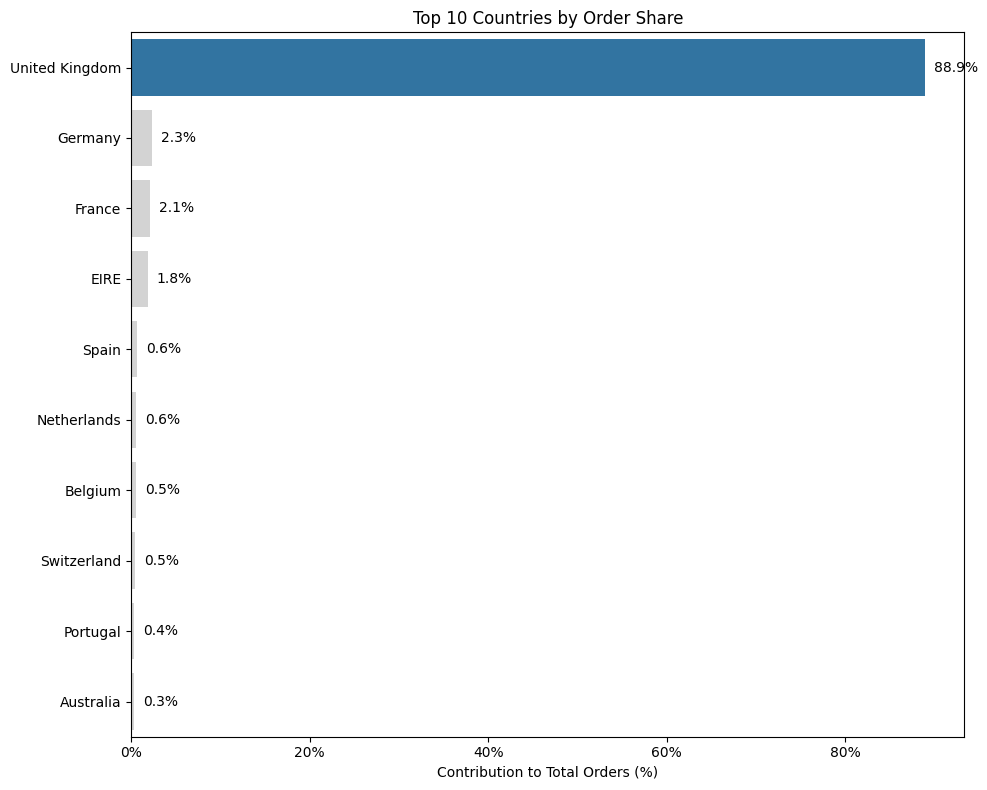

In [ ]:
import matplotlib.ticker as mtick

# 1) Chuẩn bị data: sort giảm dần theo '%', lấy top 10
df_top = (total_trans_per_country
          .sort_values('%', ascending=False)
          .head(10))

# 2) Tạo palette: UK màu nổi bật, các nước khác màu xám nhạt
palette = {country: ('tab:blue' if country=='United Kingdom' else 'lightgrey')
           for country in df_top['country']}

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=df_top,
    x='%', y='country',
    palette=palette,
    order=df_top['country'], 
    ax=ax
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# 3) Lấy toạ độ cho data labels và set chúng vào vị trí
for p in ax.patches:
    width = p.get_width()
    y    = p.get_y() + p.get_height() / 2
    ax.text(width + 1, y, f"{width:.1f}%", va='center')

ax.set_xlabel("Contribution to Total Orders (%)")
ax.set_ylabel("")
ax.set_title("Top 10 Countries by Order Share")

plt.tight_layout()
plt.show()


>* UK đóng góp 89% dataset, do đó đối với tập dữ liệu này tôi sẽ lọc và chỉ phân tích nước Anh

In [203]:
clean_df = clean_df[clean_df['country'] == "United Kingdom"]
clean_df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [141]:
print(f"- Shape of the original dataframe is: {df.shape}")

print(f"- The shape of the DataFrame after cleaning nulls, duplicates, and irrelevant data is: {clean_df.shape}")

- Shape of the original dataframe is: (541909, 8)
- The shape of the DataFrame after cleaning nulls, duplicates, and irrelevant data is: (349227, 9)


In [135]:
# Feature engineering revenue column
clean_df['revenue'] = clean_df['quantity'] * clean_df['unitprice']
clean_df

C:\Users\Alvin Nguyen\AppData\Local\Temp\ipykernel_63652\1013567398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['revenue'] = clean_df['quantity'] * clean_df['unitprice']


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,214.80


## Create a heatmap to investigate the correlation between numerical variables

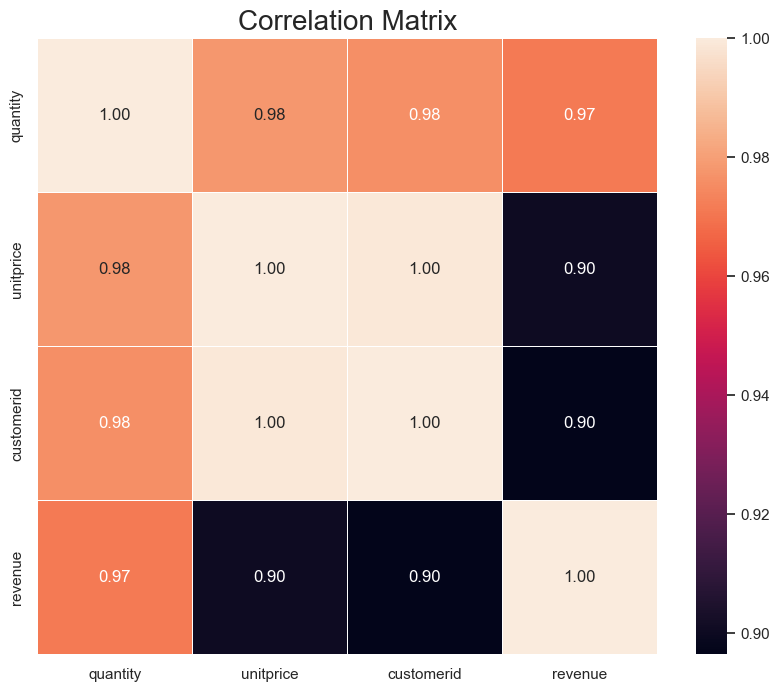

In [136]:
corr_data2 = clean_df.describe(include=['float64', 'int64'])
corr_data2

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data2.corr(), annot=True, fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

# **Step 3: Feature Engineering - Calculate RFM Score and RFM Segments**

## Calculate RFM Values

In [137]:
# Calculating Recency, Frequency, and Monetery
# Group invoice_date, invoice_no, revenue to calculate Recency, Frequency and Monetery
df_grouped = clean_df.groupby(['customerid'], as_index=False).agg({'invoicedate': 'max', 'invoiceno': 'count', 'revenue': 'sum' })

# Sort values by customer_id
df_grouped = df_grouped.sort_values(by='customerid', ascending=True, ignore_index=True)

# Rename columns Frequency and Monetery
df_grouped.rename(columns={'invoicedate': 'max_date',
                           'invoiceno': 'Frequency',
                           'revenue': 'Monetary'}, inplace=True)

df_grouped['max_date'] = df_grouped['max_date'].astype('datetime64[ns]')

# Since the recency values is calculated by the time since last order compare to today's date. 
# We choose reference point for calculating recency values is 2017-12-31
cur_date = dt.datetime(2011,12,31,0,0,0)
df_grouped['Recency'] = (cur_date - df_grouped['max_date']).dt.days

rfm_df = df_grouped.drop('max_date', axis=1)
rfm_df

,customerid,Frequency,Monetary,Recency
0,12346.0,1,77183.60,346
1,12747.0,103,4196.01,130
2,12748.0,4413,33053.19,112
3,12749.0,199,4090.88,151
4,12820.0,59,942.34,95
...,...,...,...,...
3916,18280.0,10,180.60,298
3917,18281.0,7,80.82,201
3918,18282.0,12,178.05,147
3919,18283.0,721,2045.53,116


## Calculate RFM Scores

>* Assign range for RFM then calculate R score, F score, and M score using quintiles method. R_variable range from 5 to 1 (in descending order) and R_variable will contain the integers 5, 4, 3, 2, and 1
>* Note: set q parameter = 5 since we want to divide data into 5 quantiles.
>* Using qcut() function to calculate the recency score, frequency score, monetary score for each row. 

In [138]:
# pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

R_variable = range(5, 0, -1)
F_variable = range(1, 6)
M_variable = range(1, 6)

rfm_df['R_scores'] = pd.qcut(rfm_df['Recency'], q = 5, labels = R_variable)
rfm_df['F_scores'] = pd.qcut(rfm_df['Frequency'], q = 5, labels = F_variable)
rfm_df['M_scores'] = pd.qcut(rfm_df['Monetary'], q = 5, labels = M_variable)

# Change R+F+M_Scores to string data type to cancat RFM_Scores
rfm_df = rfm_df.astype({'R_scores': 'str', 'F_scores': 'str', 'M_scores': 'str'})
rfm_df['RFM_Scores'] = rfm_df['R_scores'] + rfm_df['F_scores'] + rfm_df['M_scores']
rfm_df

,customerid,Frequency,Monetary,Recency,R_scores,F_scores,M_scores,RFM_Scores
0,12346.0,1,77183.60,346,1,1,5,115
1,12747.0,103,4196.01,130,3,4,5,345
2,12748.0,4413,33053.19,112,4,5,5,455
3,12749.0,199,4090.88,151,3,5,5,355
4,12820.0,59,942.34,95,4,4,4,444
...,...,...,...,...,...,...,...,...
3916,18280.0,10,180.60,298,1,1,1,111
3917,18281.0,7,80.82,201,2,1,1,211
3918,18282.0,12,178.05,147,3,1,1,311
3919,18283.0,721,2045.53,116,3,5,5,355


>* F_scores = Higher **Frequency** value is better = 5 >< Lower is worse = 1
>* R_Scores = Lower **Recency** value is better = 5 >< Higher is worse = 1
>* M_Scores = Higher **Monetary** value is better = 5 >< Lower is worse = 1

## Evaluate RFM Segment by RFM Scores

*__Convert RFM_Scores column of segment_alt and RFM tables to int64 type for merging__*

In [139]:
rfm_df = rfm_df.astype({'RFM_Scores': 'int64'})

segment_alt = segment_alt.astype({'RFM_Scores': 'int64'})

segment_alt.info()
print("----------------------------------")
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Segment     125 non-null    object
 1   RFM_Scores  125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  3921 non-null   float64
 1   Frequency   3921 non-null   int64  
 2   Monetary    3921 non-null   float64
 3   Recency     3921 non-null   int64  
 4   R_scores    3921 non-null   object 
 5   F_scores    3921 non-null   object 
 6   M_scores    3921 non-null   object 
 7   RFM_Scores  3921 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 245.2+ KB


In [140]:
merged_rfm = rfm_df.merge(segment_alt, left_on='RFM_Scores', right_on ='RFM_Scores', how='left')
merged_rfm

,customerid,Frequency,Monetary,Recency,R_scores,F_scores,M_scores,RFM_Scores,Segment
0,12346.0,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12747.0,103,4196.01,130,3,4,5,345,Loyal
2,12748.0,4413,33053.19,112,4,5,5,455,Champions
3,12749.0,199,4090.88,151,3,5,5,355,Loyal
4,12820.0,59,942.34,95,4,4,4,444,Loyal
...,...,...,...,...,...,...,...,...,...
3916,18280.0,10,180.60,298,1,1,1,111,Lost customers
3917,18281.0,7,80.82,201,2,1,1,211,Hibernating customers
3918,18282.0,12,178.05,147,3,1,1,311,New Customers
3919,18283.0,721,2045.53,116,3,5,5,355,Loyal


# **Step 4. Vizualization Data**

## Segments analyze by Bubble Chart

In [29]:
descriptive_rfm = merged_rfm.groupby('Segment').agg({
'Recency':['mean'],
'Frequency':['mean','min','max','count'],
'Monetary':['mean','min','max']}).round(1)


descriptive_rfm.sort_values(by=[('Recency', 'mean'), ('Frequency','count')], ascending=False, inplace=True)

descriptive_rfm

Recency Frequency                 Monetary         \
                         mean      mean min   max count     mean    min   
Segment                                                                   
Lost customers          319.1      12.2   1    74   324    175.2    3.8   
Cannot Lose Them        283.0      84.2   1   371    91   5241.9  464.0   
At Risk                 235.5     102.9  14  1028   508   1481.3  252.8   
Hibernating customers   229.0      23.2   1    57   625    388.6   32.6   
About To Sleep          173.2      22.6   1    93   106    252.3   63.4   
Loyal                   120.2     173.0  30  2677   531   4288.1  465.9   
Need Attention          113.4      51.4  16   119   192   1197.8  469.0   
Champions                93.7     285.1  58  7676   471   5737.9  891.2   
Potential Loyalist       85.7      54.6  14   213   443    517.9   93.8   
New Customers            80.5       9.0   1    29   326    199.1    0.0   
Promising                72.3      17.6   1    29   304    741.0   62.4   

                                 
                            max  
Segment                          
Lost customers            440.0  
Cannot Lose Them       168472.5  
At Risk                 28337.4  
Hibernating customers     889.9  
About To Sleep            842.6  
Loyal                  194390.8  
Need Attention           6912.0  
Champions              259657.3  
Potential Loyalist        886.7  
New Customers             463.8  
Promising               12393.7

In [30]:
# Define thresholds
high_frequency_threshold = 50  
high_recency_threshold = 200  

# Filter the data
filtered_segments = descriptive_rfm[(descriptive_rfm[('Frequency', 'count')] > high_frequency_threshold) & 
                                    (descriptive_rfm[('Recency', 'mean')] > high_recency_threshold)]

filtered_segments


Recency Frequency                 Monetary         \
                         mean      mean min   max count     mean    min   
Segment                                                                   
Lost customers          319.1      12.2   1    74   324    175.2    3.8   
Cannot Lose Them        283.0      84.2   1   371    91   5241.9  464.0   
At Risk                 235.5     102.9  14  1028   508   1481.3  252.8   
Hibernating customers   229.0      23.2   1    57   625    388.6   32.6   

                                 
                            max  
Segment                          
Lost customers            440.0  
Cannot Lose Them       168472.5  
At Risk                 28337.4  
Hibernating customers     889.9

>* Các khách hàng phát sinh giao dịch nhiều nhưng đã lâu không mua hàng cần chú ý!!

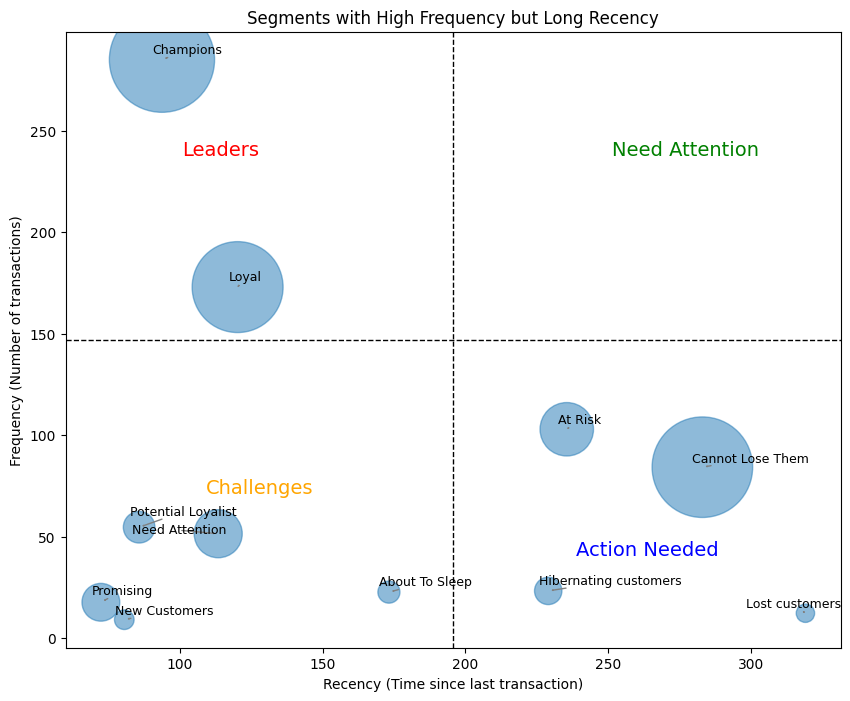

In [31]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for Recency vs Frequency with bubble size proportional to Monetary
plt.scatter(descriptive_rfm[('Recency', 'mean')], descriptive_rfm[('Frequency', 'mean')],
            s=descriptive_rfm[('Monetary', 'mean')], alpha=0.5)

# List to store text labels
texts = []

# Adding text labels for each segment
for i, segment in enumerate(descriptive_rfm.index):
    text = plt.text(descriptive_rfm[('Recency', 'mean')].iloc[i], 
                    descriptive_rfm[('Frequency', 'mean')].iloc[i],
                    segment, fontsize=9, ha='right', va='bottom')
    texts.append(text)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Find the midpoints of Recency and Frequency
recency_min = descriptive_rfm[('Recency', 'mean')].min()
recency_max = descriptive_rfm[('Recency', 'mean')].max()
frequency_min = descriptive_rfm[('Frequency', 'mean')].min()
frequency_max = descriptive_rfm[('Frequency', 'mean')].max()

recency_mid = (recency_min + recency_max) / 2
frequency_mid = (frequency_min + frequency_max) / 2

# Adding vertical and horizontal lines to divide the plot into quadrants
plt.axhline(y=frequency_mid, color='black', linestyle='--', linewidth=1)
plt.axvline(x=recency_mid, color='black', linestyle='--', linewidth=1)

# Adding quadrant labels
plt.text(0.2, 0.8, 'Leaders', fontsize=14, color='red', ha='center', transform=ax.transAxes)
plt.text(0.8, 0.8, 'Need Attention', fontsize=14, color='green', ha='center', transform=ax.transAxes)
plt.text(0.25, 0.25, 'Challenges', fontsize=14, color='orange', ha='center', transform=ax.transAxes)
plt.text(0.75, 0.15, 'Action Needed', fontsize=14, color='blue', ha='center', transform=ax.transAxes)

# Labels and title
plt.title('Segments with High Frequency but Long Recency')
plt.xlabel('Recency (Time since last transaction)')
plt.ylabel('Frequency (Number of transactions)')

# Show plot
plt.show()


>* Kích thước của bong bóng phản ánh doanh thu của segment đó.
>* Champions, Loyal segments là 2 nhóm đang thúc đẩy doanh thu và transactions nhiều nhất.
>* Nhóm At Risk, Can not Lose, Hibernating thể hiện tiềm năng cả về giá trị đơn hàng lẫn số lượng đơn hàng tốt tuy nhiên chưa có thói quen mua hàng, Nhóm khách hàng Lost customers thể hiện dấu hiệu sắp rời bỏ.

---

## Phân tích Distribution của 3 chỉ số RFM

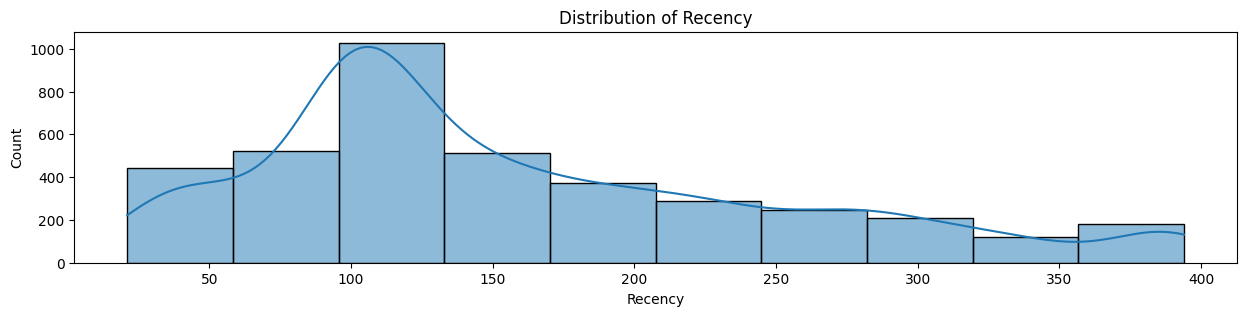

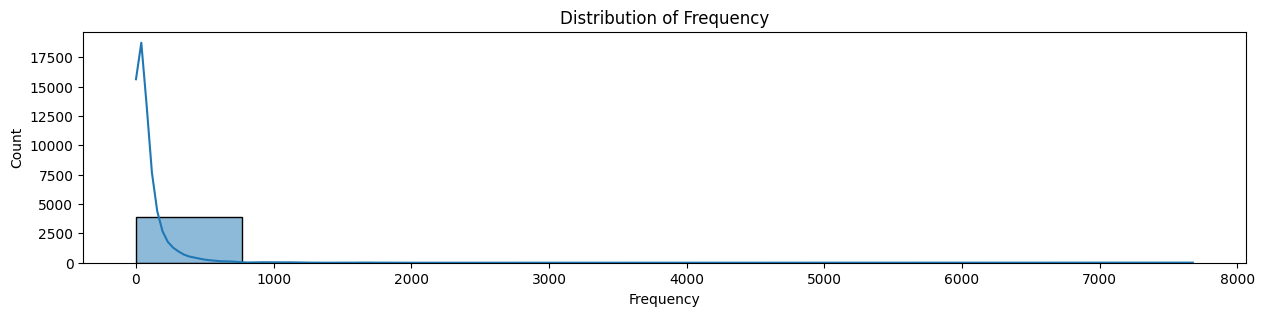

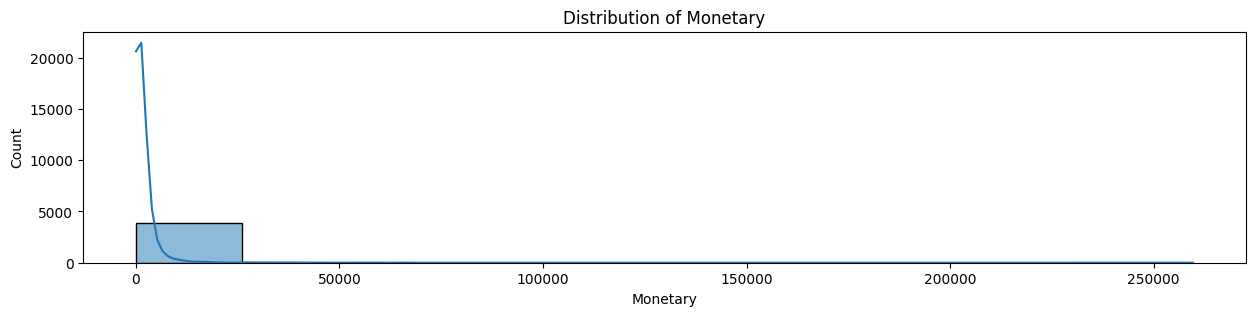

In [32]:
column_names = ['Recency', 'Frequency', 'Monetary']

for col in column_names:
    fig, ax = plt.subplots(figsize=(15,3))
    sns.histplot(merged_rfm[col], kde=True, bins=10)
    ax.set_title(f'Distribution of {col}')
    plt.show()

## Segment contribute by Treemap

In [33]:
# Group columns to create tree map
group_segment = merged_rfm.groupby(['Segment']).agg({'customerid': 'count', 'Monetary': 'sum', 'Recency': 'mean'}).reset_index()
group_segment.sort_values(by='customerid', ascending=False, ignore_index=True)

# Rename columns
group_segment.rename(columns={'Segment': 'segment'
                             ,'customerid': 'customer_count'
                             ,'Monetary': 'monetary_sum'
                             ,'Recency': 'recency_mean'}, inplace=True)
group_segment


,segment,customer_count,monetary_sum,recency_mean
0,About To Sleep,106,26742.810,173.235849
1,At Risk,508,752502.521,235.476378
2,Cannot Lose Them,91,477008.690,282.989011
3,Champions,471,2702558.840,93.694268
4,Hibernating customers,625,242874.430,229.003200
5,Lost customers,324,56758.090,319.141975
6,Loyal,531,2277001.050,120.214689
7,Need Attention,192,229971.070,113.411458
8,New Customers,326,64897.281,80.527607
9,Potential Loyalist,443,229445.192,85.724605


In [34]:
group_segment['customer_perc'] = group_segment['customer_count'] / group_segment['customer_count'].sum()
group_segment['monetary_perc'] = group_segment['monetary_sum'] / group_segment['monetary_sum'].sum()
group_segment.sort_values(by='customer_count',ascending=False)

,segment,customer_count,monetary_sum,recency_mean,customer_perc,monetary_perc
4,Hibernating customers,625,242874.430,229.003200,0.159398,0.033339
6,Loyal,531,2277001.050,120.214689,0.135425,0.312559
1,At Risk,508,752502.521,235.476378,0.129559,0.103294
3,Champions,471,2702558.840,93.694268,0.120122,0.370975
9,Potential Loyalist,443,229445.192,85.724605,0.112981,0.031495
8,New Customers,326,64897.281,80.527607,0.083142,0.008908
5,Lost customers,324,56758.090,319.141975,0.082632,0.007791
10,Promising,304,225264.670,72.345395,0.077531,0.030922
7,Need Attention,192,229971.070,113.411458,0.048967,0.031568
0,About To Sleep,106,26742.810,173.235849,0.027034,0.003671


*__Set up params to visualize Frequency Distribution__*

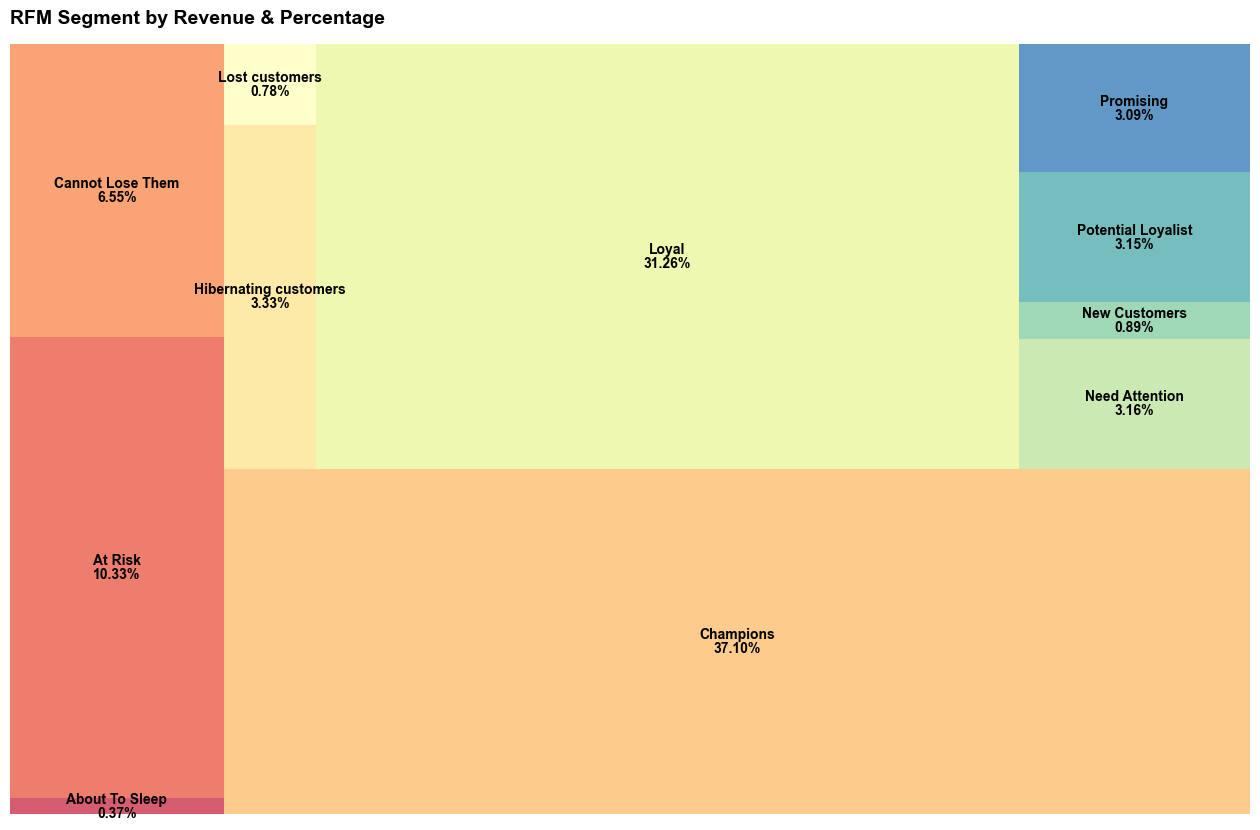

In [35]:
fig, ax = plt.subplots(figsize = (16, 10))
sizes = group_segment['monetary_sum']
labels = group_segment['segment']
colors = sns.color_palette('Spectral', len(group_segment['segment']))
# Create treemap using squarify library
fig = sq.plot(sizes=sizes,
        label=labels,
        value= [f'{x*100:.2f}%' for x in group_segment['monetary_perc']],
        color=colors,
        alpha=.8,
        text_kwargs={'fontsize': 10, 'weight': 'bold'}
       )
# Remove cluster, and update layout
plt.axis(False)
plt.title('RFM Segment by Revenue & Percentage',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')
sns.set_style(style='whitegrid')
plt.show()


## Number of transactions and revenue by Segments

C:\Users\Alvin Nguyen\AppData\Local\Temp\ipykernel_63652\3256224281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


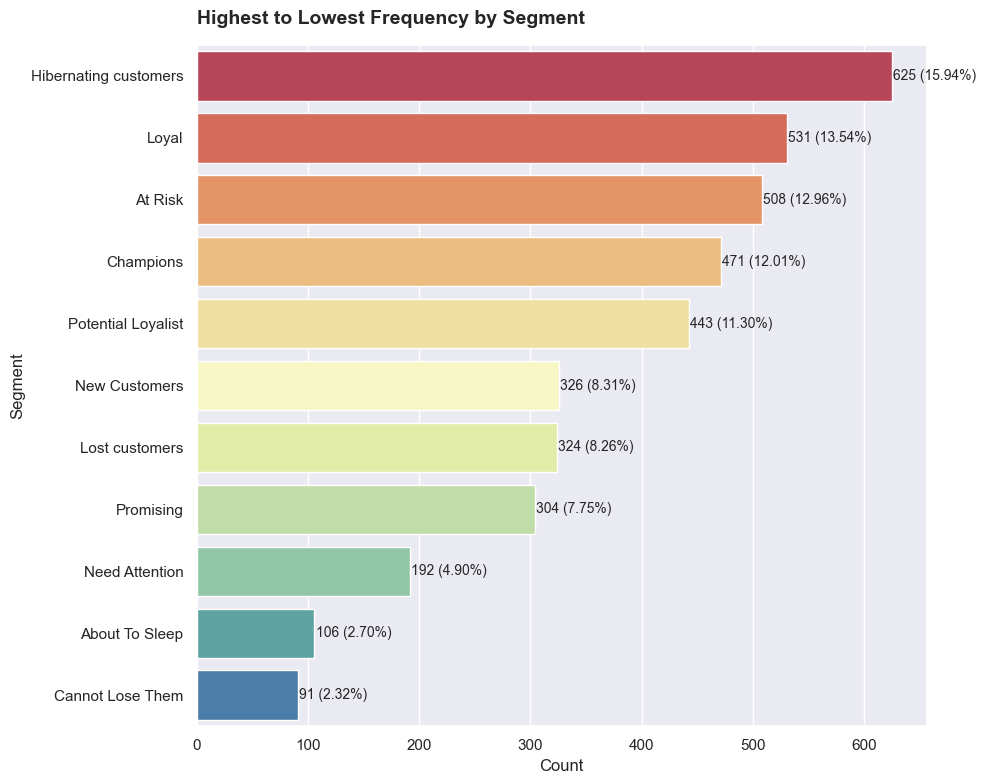

In [38]:
# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the horizontal countplot, ordered by descending frequency
order = merged_rfm['Segment'].value_counts(ascending=False).index
sns.countplot(
    y=merged_rfm['Segment'],
    order=order,
    palette=colors,
    ax=ax
)

# Compute absolute counts and relative percentages
abs_vals = merged_rfm['Segment'].value_counts(ascending=False)
rel_vals = merged_rfm['Segment'].value_counts(ascending=False, normalize=True) * 100

# Build a list of labels like "123 (12.34%)"
labels = [f'{count} ({pct:.2f}%)'
          for count, pct in zip(abs_vals, rel_vals)]

# Annotate each bar with its label
for bar, label in zip(ax.patches, labels):
    width = bar.get_width()                # The length of the bar
    y    = bar.get_y() + bar.get_height()/2  # Vertical center of bar
    ax.text(
        width + 1,    # place label just past the end of the bar
        y,
        label,
        va='center',
        fontsize=10
    )

# Final styling
sns.set_theme(style='darkgrid')
ax.set_title(
    'Highest to Lowest Frequency by Segment',
    fontdict={'size': 14, 'weight': 'bold'},
    pad=15,
    loc='left'
)
ax.set_xlabel('Count')
ax.set_ylabel('Segment')

plt.tight_layout()
plt.show()



C:\Users\Alvin Nguyen\AppData\Local\Temp\ipykernel_63652\196805080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(group1,


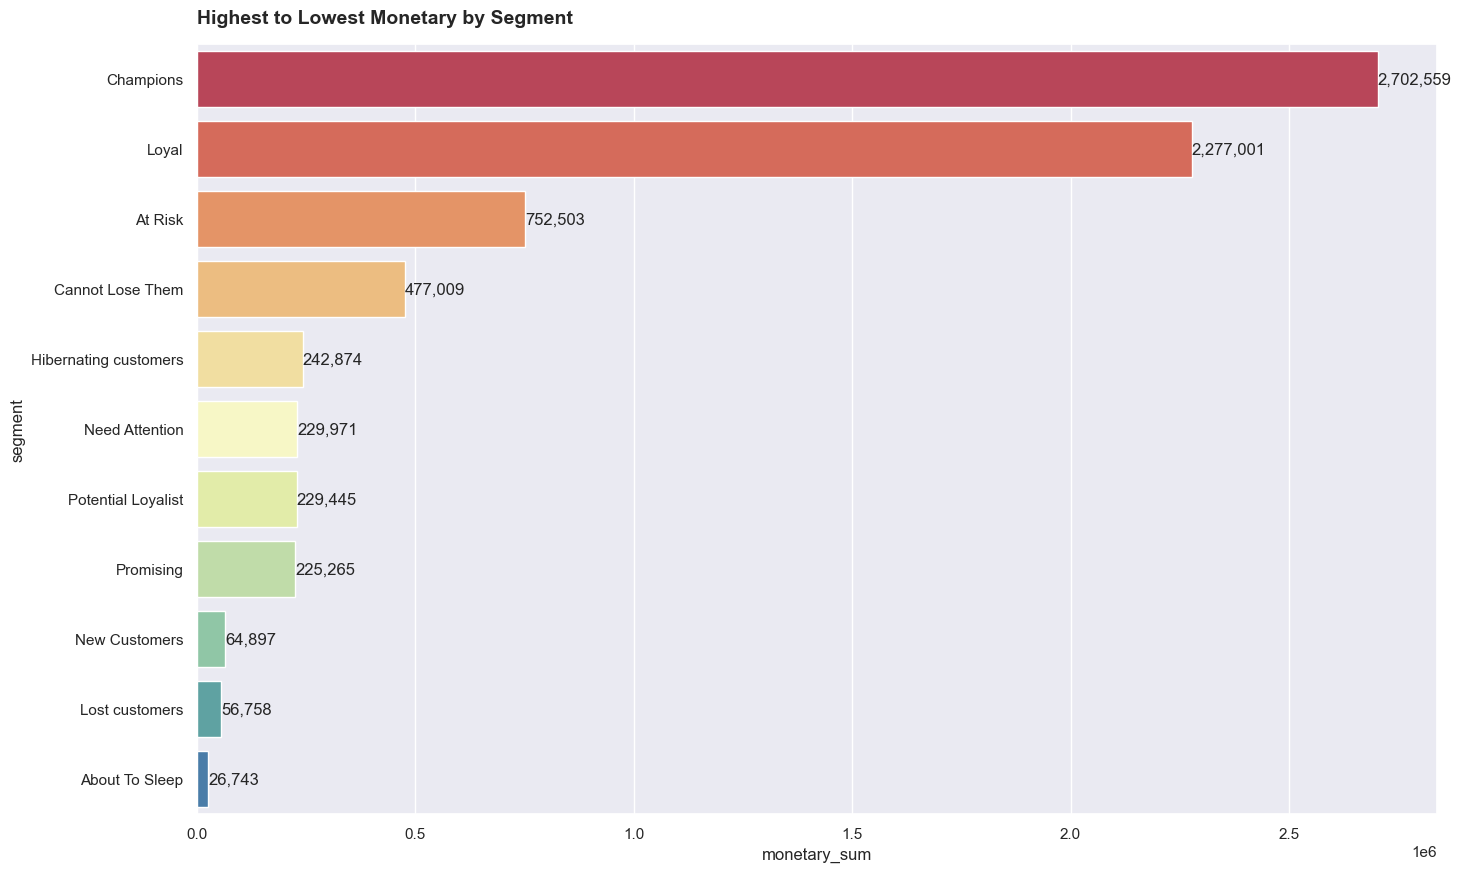

In [39]:
group1 = group_segment.copy()
group1[['monetary_sum', 'recency_mean']] = group1[['monetary_sum','recency_mean']].round(0)
# group1 = group1.astype({'segment': 'category'})

# Set up plot's params:
order = group1.groupby('segment').sum().sort_values('monetary_sum', ascending=False).index
# color = sns.color_palette(palette='Spectral', n_colors=len(group1['segment']))

ax = sns.barplot(group1,
                 y='segment',
                 x='monetary_sum',
                 order=order, palette=colors)

sns.set_theme(style='darkgrid', rc={'figure.figsize':(16,10)})

plt.title('Highest to Lowest Monetary by Segment',
         fontdict={'size': 14, 'weight': 'bold'},
         pad=15, loc='left')

# Set comma seperated for data labels
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}', fontsize=12)
    
plt.show()

---
# **Step 5: Report and Analysis**


1. Segments with High Frequency but Long Recency  

![Segments with High Frequency but Long Recency](./image/analysis%20image/Visualize/bubble%20chart.png)  

- **Observation:** The “Need Attention” segment used to purchase frequently but hasn’t bought in a long time, putting them at high risk of churn.  
- **Recommendation:** Roll out personalized win-back offers and reminders to re-engage this valuable yet slipping group.

---

2. Highest to Lowest Frequency by Segment  

![Highest to Lowest Frequency by Segment](./image/analysis%20image/Visualize/customer%20frequency%20by%20segment.png)  

- **Observation:** “Hibernating customers” and “Loyal” segments drive the most transactions, while “Cannot Lose Them” surprisingly shows low order volume.  
- **Recommendation:** Boost engagement for the “Cannot Lose Them” segment with exclusive promotions to increase their purchase frequency.

---

3. Highest to Lowest Monetary by Segment 

![Highest to Lowest Monetary by Segment](./image/analysis%20image/Visualize/revenue%20by%20segment.png)  

- **Observation:** “Champions” and “Loyal” customers account for the lion’s share of revenue, whereas “About To Sleep” and “Lost customers” contribute very little.  
- **Recommendation:** Invest in loyalty rewards for top spenders and deploy targeted recovery campaigns for low-revenue segments to maximize ROI.

---

4. Distribution of Recency, Frequency & Monetary  

![RFM Value Distribution](./image/analysis%20image/Visualize/rfm%20value%20distribution.png)  

- **Observation:** Recency centers around mid-range days, but Frequency and Monetary are heavily right-skewed—few customers are extremely active or high-spending.  
- **Recommendation:** Segment outreach: use broad-appeal promotions for the mass of infrequent buyers and VIP perks for your high-value minority.

---

5. RFM Segment by Revenue & Percentage  

![RFM Segment by Revenue & Percentage](./image/analysis%20image/Visualize/tree%20map%20by%20customer%20revenue.png)  

- **Observation:** The “Champions” segment occupies the largest revenue slice, followed by “Loyal” and “At Risk,” underscoring their importance.  
- **Recommendation:** Prioritize retention programs for Champions and Loyal customers, and launch targeted win-back initiatives for the At Risk group to safeguard revenue.

---

🔎 Key Insights & Business Recommendations

- **“Need Attention” customers** used to buy often but haven’t returned in a while, putting them at high churn risk.  
- **“Hibernating” & “Loyal” segments** account for the most transactions, while **“Cannot Lose Them”** surprisingly under-orders.  
- **“Champions” & “Loyal”** drive the lion’s share of revenue; **“About To Sleep”** and **“Lost”** contribute very little.  
- RFM shows **moderate recency** but **highly skewed frequency & monetary**—a small group of power buyers and a large base of infrequent shoppers.  
- **“Champions,” “Loyal,” and “At Risk”** represent the largest revenue slices, making them critical targets.

✅ Business Recommendations

- **Win-back “Need Attention”** with personalized offers and gentle reminders.  
- **Activate “Cannot Lose Them”** via exclusive promotions to boost their order volume.  
- **Reward your top spenders** (Champions & Loyal) with VIP perks, early access, or loyalty tiers.  
- **Segment outreach**: broad-appeal campaigns for infrequent buyers; VIP experiences for high-value customers.  
- **Retain & recover**: run targeted re-engagement for At Risk and Lost segments to safeguard revenue.  
- **Monitor & iterate**: refresh RFM scores monthly and A/B-test messaging by segment to continuously improve ROI.  
